# New Section

In [ ]:
import numpy as n
import pandas as p
d=p.read_csv("/content/Churn_Modelling.csv")
d.shape

(10000, 14)

In [ ]:
d.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
d.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
d.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

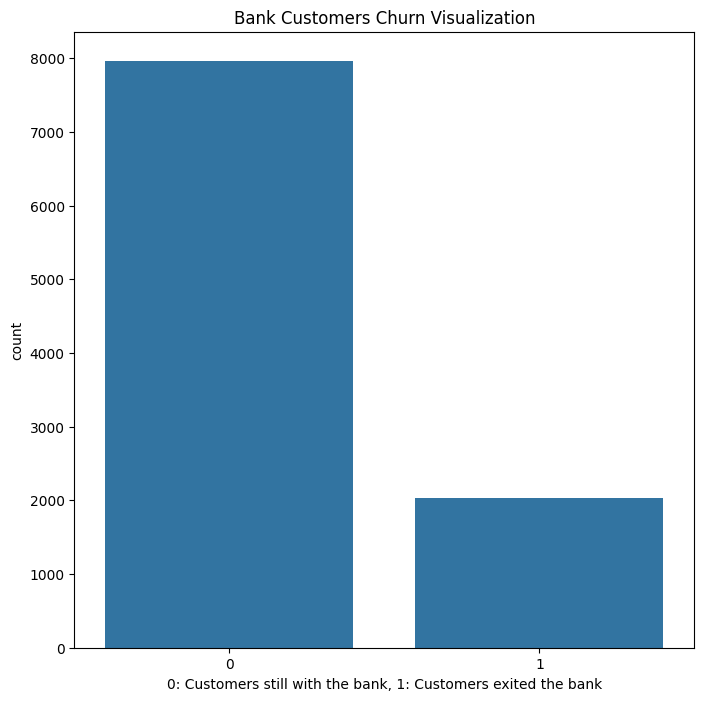

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited',data=d)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [ ]:
d.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
d.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace=True)
d.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
#feature enginnering
geo = p.get_dummies(d['Geography'], drop_first=True)
gen = p.get_dummies(d['Gender'], drop_first=True)


In [ ]:
d=p.concat([d,geo,gen], axis=1)
d.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [ ]:
d.drop(['Geography','Gender'], axis=1, inplace=True)

In [ ]:
x=d.drop('Exited',axis=1)
y=d['Exited']
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(x,y,test_size=0.2,random_state=0)
print("X's train size: {},X's test size: {}".format(xtr.shape,xts.shape))

X's train size: (8000, 11),X's test size: (2000, 11)


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtr = sc.fit_transform(xtr)
xts = sc.transform(xts)



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_history = classifier.fit(xtr, ytr, batch_size=10, validation_split=0.33, epochs=100)


Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.5049 - accuracy: 0.7972 - val_loss: 0.4594 - val_accuracy: 0.8008
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4508 - accuracy: 0.8015 - val_loss: 0.4444 - val_accuracy: 0.8020
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4384 - accuracy: 0.8050 - val_loss: 0.4354 - val_accuracy: 0.8080
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4315 - accuracy: 0.8074 - val_loss: 0.4314 - val_accuracy: 0.8088
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8108 - val_loss: 0.4273 - val_accuracy: 0.8118
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.8181 - val_loss: 0.4250 - val_accuracy: 0.8133
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4168 - accuracy: 0.8231 - val_loss: 0.4195 - val_accuracy: 0.8190

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
classifier.layers[0].get_weights()

[array([[ 0.0361498 , -0.00863817,  0.09171519, -0.00651132, -0.02807261,
         -0.06672336],
        [-0.43298608, -0.17420544, -0.19378875, -1.0384501 , -0.44572037,
          0.9918864 ],
        [ 0.05386572, -0.01131306,  0.22585614, -0.08193997, -0.0602078 ,
          0.038424  ],
        [-0.2062566 , -0.40559757, -0.14882933,  0.16463976, -0.36000496,
         -0.2928713 ],
        [-0.64858705, -1.7344024 , -0.7029076 , -0.50053495, -0.55027705,
         -0.661004  ],
        [ 0.03531327, -0.01568205,  0.1283736 , -0.02889838, -0.09242475,
          0.15327547],
        [-1.0105871 , -0.0955362 ,  1.3969753 , -0.25183848,  0.75072503,
          1.2009808 ],
        [-0.01889355,  0.04348986, -0.02106583,  0.01053984,  0.02861504,
          0.07221499],
        [-0.08834429,  0.45296368, -0.91859084,  0.38061997,  0.03001106,
          0.76262134],
        [-0.04707042, -0.09525626, -0.1320606 , -1.0766371 ,  0.04696343,
          0.05417044],
        [ 0.07126071,  0.03040

In [ ]:
classifier.layers[1].get_weights()

[array([[-0.675395  ,  0.66099656,  0.67304283, -0.18874216, -1.0624843 ,
          0.5379461 ],
        [-0.39602393, -0.63553333, -0.51141316,  1.080765  ,  0.8077455 ,
         -0.739282  ],
        [-0.00297925,  1.1231562 , -0.72998214,  0.39011773, -0.8246396 ,
          0.10977013],
        [ 0.37262824, -0.73080415,  0.36523554, -0.9281412 , -0.50093746,
         -0.07937406],
        [ 0.52788895, -0.36584747, -0.15610206, -0.44268402, -0.20162162,
          0.85473716],
        [ 0.4615454 ,  0.01252511,  1.3710365 ,  0.24249001, -0.40075827,
         -0.49568254]], dtype=float32),
 array([2.3142967e-02, 3.8739690e-04, 2.1569921e-02, 7.8577030e-01,
        1.5286205e+00, 2.7840137e-01], dtype=float32)]

In [ ]:
classifier.layers[2].get_weights()

[array([[ 1.0719507 ],
        [ 1.0729338 ],
        [ 0.7798523 ],
        [-1.2354064 ],
        [ 0.72634155],
        [-0.81063336]], dtype=float32),
 array([2.2837684], dtype=float32)]

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

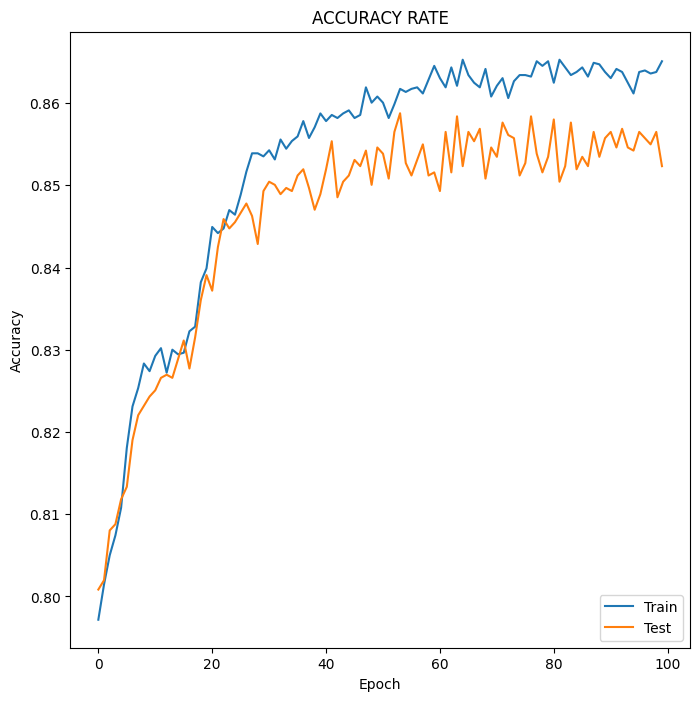

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('ACCURACY RATE')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

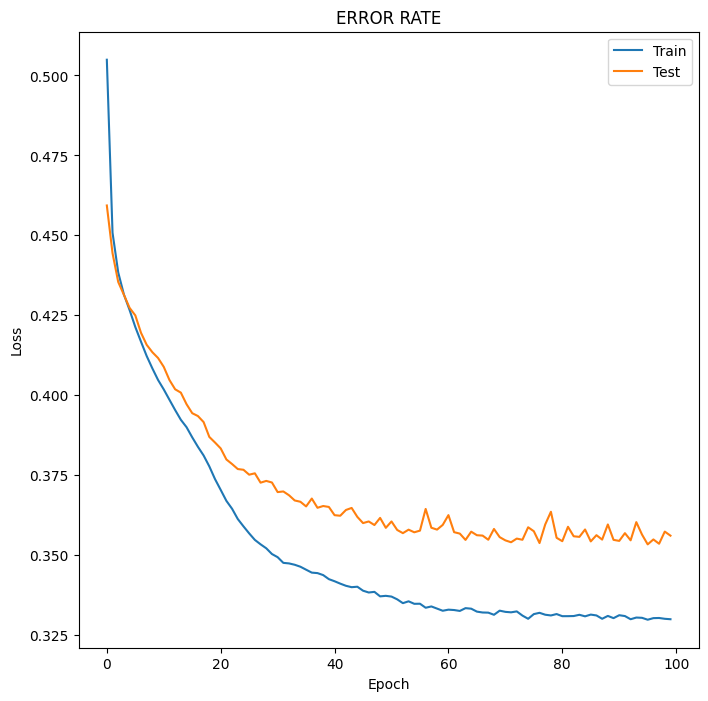

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('ERROR RATE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
yprd = classifier.predict(xts)
yprd

63/63 [==============================] - 0s 1ms/step


array([[0.18048485],
       [0.290136  ],
       [0.14199081],
       ...,
       [0.19751534],
       [0.15747951],
       [0.21902552]], dtype=float32)

In [ ]:
yprd = (yprd > 0.5)
yprd

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yts, yprd)
cm

array([[1518,   77],
       [ 203,  202]])

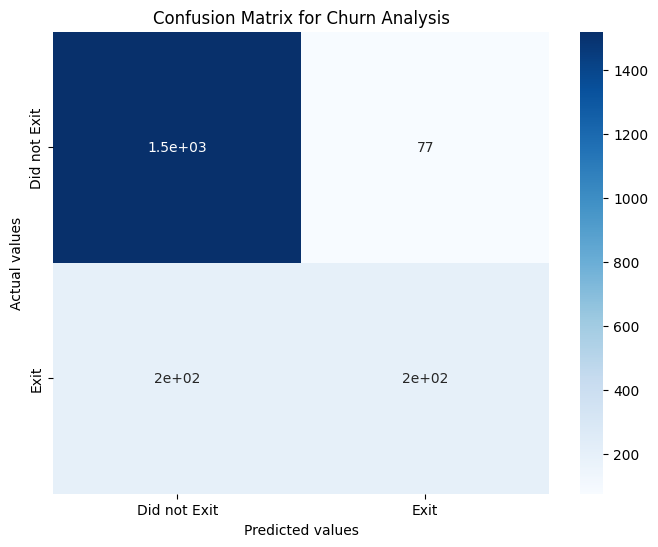

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Churn Analysis')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(yprd,yts)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 86.0%


In [ ]:
def predict_exit(sample_value):

  # Convert list to numpy array
  sample_value = n.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [ ]:
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 21ms/step
Prediction: Low change of exit.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 32ms/step
Prediction: High change of exit!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

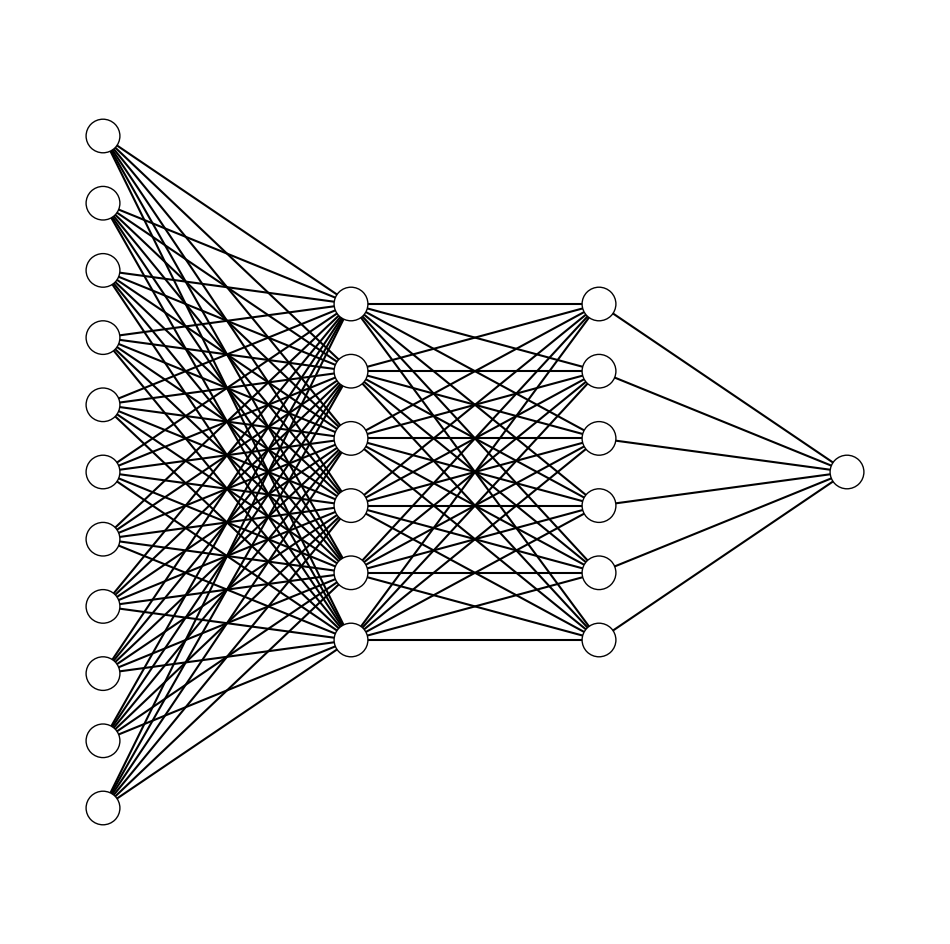

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [11, 6,6, 1])
fig.savefig('nn.png')

In [ ]:

import matplotlib.pyplot as plt

def draw_neural_net(layer_sizes, ax=None, left=.1, right=.9, bottom=.1, top=.9,color='w', layer_text=None, Bias=False):
    '''
    Draw a neural network cartoon using matplotilb.

    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca()). Default: gca
        - left : float
            The center of the leftmost node(s) will be placed here. Default = 0.1
        - right : float
            The center of the rightmost node(s) will be placed here. Default = 0.9
        - bottom : float
            The center of the bottommost node(s) will be placed here. Default = 0.1
        - top : float
            The center of the topmost node(s) will be placed here. Default = 0.9
        - color: string or array of string or array of array of int
            The color of the nodes (layer by layer)
            Example:
                color='k' -> black neurons
                color=['r','k','b'] -> red input layer, black hidden layer, blue output layer
                color=['r',[0.34,0.72,0.59],'g'] -> can use RGB value as well
                RejlersGreen = [0.34,0.72,0.59]
                RejlersPink = [0.96, 0.70, 0.73]
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    c = color
    if ax is None:
        ax = plt.gca()

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            if len(color) > 1:
                c = color[n]
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color=c, ec='k', zorder=4)
            ax.add_artist(circle)
            # Node annotations
            if layer_text:
                text = layer_text.pop(0)
                plt.annotate(text, xy=(n*h_spacing + left, layer_top - m*v_spacing), zorder=5, ha='center', va='center')
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                if Bias== True:
                    if o >= 1 and n>=1 and n<=(n_layers-3):
                        ax.add_artist(line)
                    if n==0 and o >= 1:
                        ax.add_artist(line)
                    if o >= 0 and n>(n_layers-3):
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)


    # Beautify the axes
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

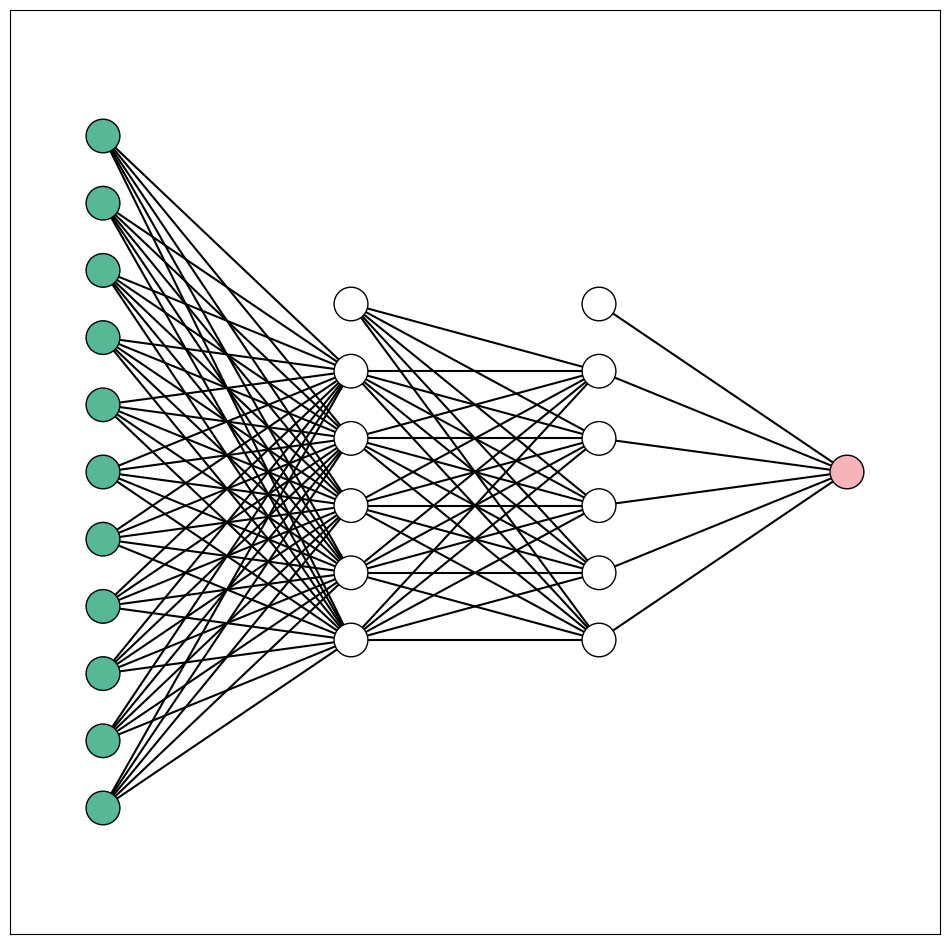

In [ ]:
#node_text = ['','','','','h1\u2081','h1\u2082','h1\u2083','h1\u2084','h1\u2085', 'h1\u2086','h1\u2099']
RejlersGreen = [0.34,0.72,0.59]
RejlersPink = [0.96, 0.70, 0.73]
layer_color=[RejlersGreen,'w', 'w',RejlersPink]
fig = plt.figure(figsize=(12, 12))
draw_neural_net([11, 6, 6, 1], None, .1, .9, .1, .9, color=layer_color,layer_text=node_text, Bias=True)